## Libraries

In [2]:
#import libraries for Ads classification
import os
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import pyplot
import seaborn as sns 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [63]:
#set current working directory
os.chdir("C:/Users/BATMAN/Desktop/ZS test/Data Sets")

## Load data-sets

In [64]:
#Load train and test data
train_df = pd.read_csv("C:/Users/BATMAN/Desktop/ZS test/Data Sets/train.csv")
test_df = pd.read_csv("C:/Users/BATMAN/Desktop/ZS test/Data Sets/test.csv")
submission_binary = pd.read_excel('C:/Users/BATMAN/Desktop/ZS test/Data Sets/sample submission.xlsx')

## Exploratory data analysis (EDA)

In [65]:
#Checking NAN or missing values in train data
train_df.isnull().sum()

COMMENT_ID      0
AUTHOR          0
DATE          138
CONTENT         0
CLASS           0
dtype: int64

In [66]:
test_df.isnull().sum()

ID              0
COMMENT_ID      0
AUTHOR          0
DATE          107
CONTENT         0
dtype: int64

In [67]:
#Calculate total number of clean comments
comment_count =  train_df['CONTENT'].count()
ads_comment = 0
for i in range(len(train_df)):
    if(train_df['CLASS'].iloc[i] == 1):
        ads_comment = ads_comment+1

In [68]:
#Comments study
print ('Total no. of comments/CONTENT in train data : {} '.format(comment_count))
print ('Total no. of ads as comments                : {} '.format(ads_comment))
print ('Percentage of ads as comments               : {} '.format((ads_comment/comment_count)*100))
print ('Percentage of real comments                 : {} '.format(((comment_count-ads_comment)/comment_count)*100))
print ('Total number of NAN/Null comments           : {} '.format(train_df['CONTENT'].isnull().sum()))

Total no. of comments/CONTENT in train data : 1157 
Total no. of ads as comments                : 586 
Percentage of ads as comments               : 50.648228176318064 
Percentage of real comments                 : 49.351771823681936 
Total number of NAN/Null comments           : 0 


In [69]:
#total number of comments in each category in train data
print ('Total no. of ads as comments in train data : {} '.format(ads_comment))
print ('Total no. of real comments in train data   : {} '.format(comment_count-ads_comment))

Total no. of ads as comments in train data : 586 
Total no. of real comments in train data   : 571 


In [70]:
#Check datatypes of train_df
train_df.dtypes

COMMENT_ID    object
AUTHOR        object
DATE          object
CONTENT       object
CLASS          int64
dtype: object

In [71]:
#Calculating comment lenghts
sum_len_com = 0
for i in range(len(train_df)):
    sum_len_com = sum_len_com + len(train_df['CONTENT'].iloc[i])
    
mean_comment_length = sum_len_com/(train_df['CONTENT'].count())
    
comment_len = []
for i in range(len(train_df)):
    comment_len.append(len(train_df['CONTENT'].iloc[i]))

# Average, min and max length of comments
print ('Mean length of comment : {} '.format(mean_comment_length))
print ('Min length of comment  : {} '.format(min(comment_len)))
print ('Max length of comment  : {} '.format(max(comment_len)))

Mean length of comment : 94.25324114088158 
Min length of comment  : 2 
Max length of comment  : 1200 


In [72]:
#calculating category wise comment lenght
ads = []
real = []

for i in range(len(train_df)):
    if(train_df['CLASS'].iloc[i] == 1):
        ads.append(train_df['CONTENT'].iloc[i])
    else:
        real.append(train_df['CONTENT'].iloc[i])

In [73]:
# Dropping variables unessential for analysis.
train_df = train_df.drop(['COMMENT_ID'], axis =1)
test_df = test_df.drop(['COMMENT_ID'], axis =1)

In [74]:
#storing english stopwords in stop  variable
stop = set(stopwords.words('english'))
#defining function to clean the text comments
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub('_', ' ',text)
    
    text = " ".join([i for i in text.split() if i not in stop])
    text = "".join(i for i in text if not i.isdigit())
    text = text.strip(' ')
    return text

In [75]:
#Cleaning the train and test text comments using clean_text function
train_corpus = [clean_text(train_df.iloc[i,2]) for i in range(0, train_df.shape[0])]
test_corpus = [clean_text(test_df.iloc[i,3]) for i in range(0, test_df.shape[0])]
#Storing the clean train and test corpus into dataframe
train_df['CONTENT'] = pd.DataFrame(train_corpus)
test_df['CONTENT'] = pd.DataFrame(test_corpus)

In [76]:
def stem(text):
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
        return text

In [77]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemm(text):
        text = text.split()
        lemm_words = [wordnet_lemmatizer.lemmatize(word) for word in text]
        text = " ".join(lemm_words)
        return text

In [78]:
# Stemmeing and lemmetization of CONTENT in train data
train_corpus = [lemm(train_df.iloc[i,2]) for i in range(0, train_df.shape[0])]
train_corpus = [stem(train_df.iloc[i,2]) for i in range(0, train_df.shape[0])]
train_df['CONTENT'] = pd.DataFrame(train_corpus)
# Stemmeing and lemmetization of CONTENT in train data
test_corpus = [lemm(test_df.iloc[i,3]) for i in range(0, test_df.shape[0])]
test_corpus = [stem(test_df.iloc[i,3]) for i in range(0, test_df.shape[0])]
test_df['CONTENT'] = pd.DataFrame(test_corpus)

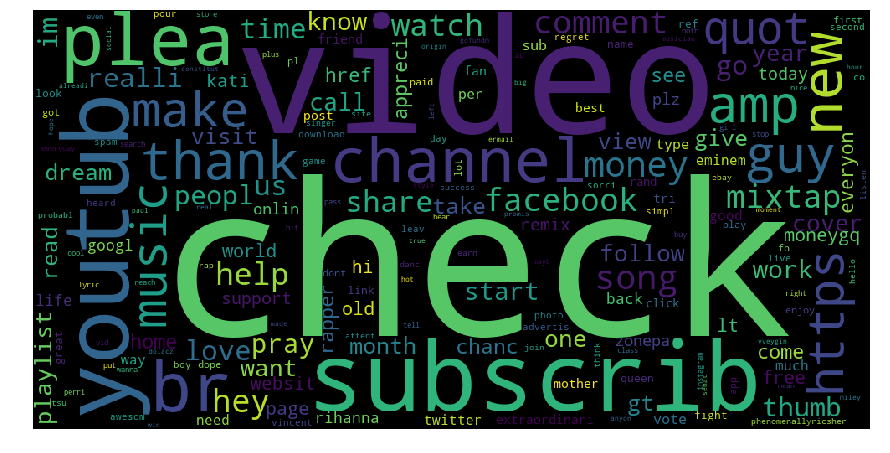

In [79]:
#Word cloud for ads comment
w=[]
for i in range(len(train_df)):
    if train_df['CLASS'].iloc[i] ==1:
        y = (train_df['CONTENT'].iloc[i])
        w.append(y)
        
wordcloud = WordCloud(width = 1000, height = 500, stopwords=STOPWORDS, background_color='black',collocations=False).generate(' '.join(w))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

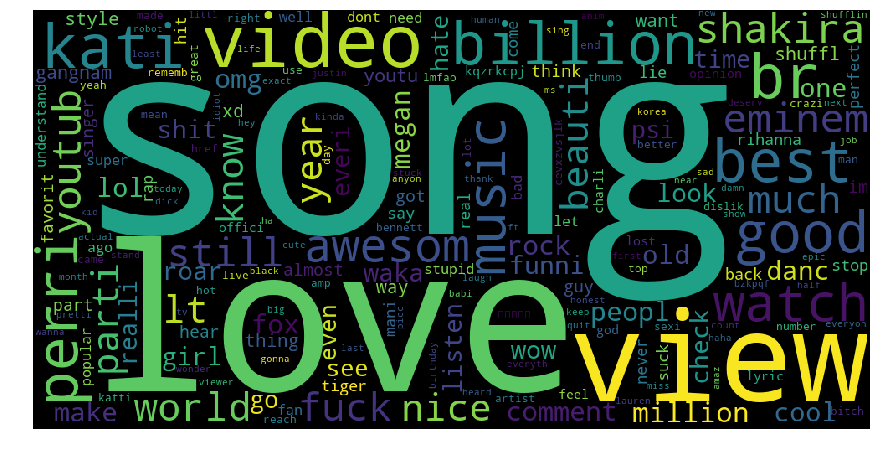

In [80]:
#Word cloud for ads comment
w=[]
for i in range(len(train_df)):
    if train_df['CLASS'].iloc[i] ==0:
        y = (train_df['CONTENT'].iloc[i])
        w.append(y)
        
wordcloud = WordCloud(width = 1000, height = 500, stopwords=STOPWORDS, background_color='black',collocations=False).generate(' '.join(w))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [81]:
#get the comment text of train and test in seperate variables
train = train_df['CONTENT']
test = test_df['CONTENT']

In [82]:
# Instantiate TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')

In [83]:
#learn training data vocabulry and make a document-term-matrix
#transform the test data from the learned vocabulary and make a document-term-matx_rix
X_train_dtm = vect.fit_transform(train)
X_test_dtm = vect.transform(test)

In [84]:
X_test_dtm

<799x2379 sparse matrix of type '<class 'numpy.float64'>'
	with 4961 stored elements in Compressed Sparse Row format>

### Apply Machine Learning Algorithm

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [96]:
# Logistic regression
logreg = LogisticRegression()
#Load sample submission file
y = train_df['CLASS']
logreg.fit(X_train_dtm, y)                                                #train the model using train_dtm & y
train_predict = logreg.predict(X_train_dtm)                               #implement the model on train data for accuracy
test_predict = logreg.predict(X_test_dtm)                  #implement the model on test data
x1 = accuracy_score(y, train_predict)
print('Training accuracy is {} '.format(x1))#Training accuracy

Training accuracy is 0.9619706136560069 


In [97]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
y = train_df['CLASS']
knn.fit(X_train_dtm, y)                                             #train the model using train_dtm & y
X_pred_knn = knn.predict(X_train_dtm)                                   #implement the model on train data for accuracy
Y_pred_knn = knn.predict(X_test_dtm)                                    #implement the model on test data
x2 = accuracy_score(y,X_pred_knn)
print('Training accuracy is {} '.format(x2))  #Training accuracy

Training accuracy is 0.7139152981849611 


In [98]:
# Gaussian Naive Bayes
y = train_df['CLASS']
NB_model = GaussianNB()
NB_model.fit(X_train_dtm.todense(), y)                             #train the model using train_dtm & y
X_pred_NB = NB_model.predict(X_train_dtm.todense())                   #implement the model on train data for accuracy  
Y_pred_NB = NB_model.predict(X_test_dtm.todense())                    #implement the model on test data
x3 = accuracy_score(y,X_pred_NB)
print('Training accuracy is {} '.format(x3)) #Training accuracy

Training accuracy is 0.9196197061365601 


In [99]:
# Random Forest
y = train_df['CLASS']
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_dtm, y)                                 #train the model using train_dtm & y
X_pred_RF = random_forest.predict(X_train_dtm)                       #implement the model on train data for accuracy 
Y_pred_RF = random_forest.predict(X_test_dtm)                        #implement the model on test data
x4 = accuracy_score(y,X_pred_RF)
print('Training accuracy is {} '.format(x4))#Training accuracy

Training accuracy is 0.9982713915298185 


In [100]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Gaussian Naive Bayes', 'Random Forest'],
    'Score': [x1,x2,x3,x4]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.998271
0,Logistic Regression,0.961971
2,Gaussian Naive Bayes,0.919620
1,KNN,0.713915


In [90]:
#CSV results of logistic regression
final_submission = pd.DataFrame()
final_submission['ID'] = test_df['ID']
final_submission['CLASS'] = pd.DataFrame(test_predict)
final_submission.to_csv('Final_submission.csv', index=False)

In [31]:
#CSV results of KNN results
final_submission1 = pd.DataFrame()
final_submission1['ID'] = test_df['ID']
final_submission1['CLASS'] = pd.DataFrame(Y_pred_knn)
final_submission1.to_csv('Final_submission1.csv', index=False)

In [32]:
#CSV results of Gaussian Naive Bayes
final_submission2 = pd.DataFrame()
final_submission2['ID'] = test_df['ID']
final_submission2['CLASS'] = pd.DataFrame(test_predict)
final_submission2.to_csv('Final_submission2.csv', index=False)

In [33]:
#CSV results of Random Forest
final_submission3 = pd.DataFrame()
final_submission3['ID'] = test_df['ID']
final_submission3['CLASS'] = pd.DataFrame(test_predict)
final_submission3.to_csv('Final_submission3.csv', index=False)